### Graph Previous Runs

In [3]:
import pickle

# load the graph data from train.ipynb
with open('base_run4.pkl', 'rb') as f:
    data = pickle.load(f)

episode_rewards = data['episode_rewards']
actor_losses = data['actor_losses']
critic_losses = data['critic_losses']
current_Q_means = data['current_Q_means']
target_Q_means = data['target_Q_means']

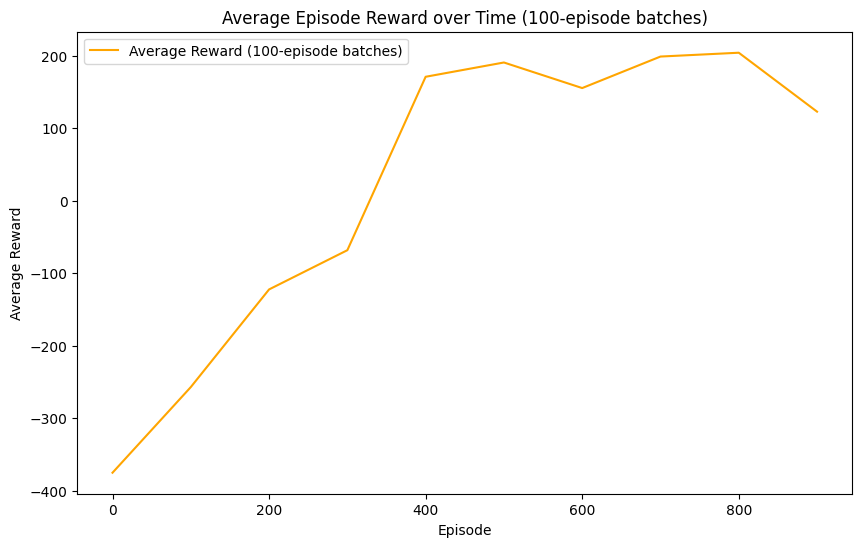

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# split the data into samples of 100 episodes
batch_size = 100
average_rewards = [np.mean(episode_rewards[i:i + batch_size]) for i in range(0, len(episode_rewards), batch_size)]

# graph the average reward
plt.figure(figsize=(10, 6))
plt.plot(range(0, len(episode_rewards), batch_size), average_rewards, label="Average Reward (100-episode batches)", color='orange')
plt.title("Average Episode Reward over Time (100-episode batches)")
plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.legend()
plt.show()


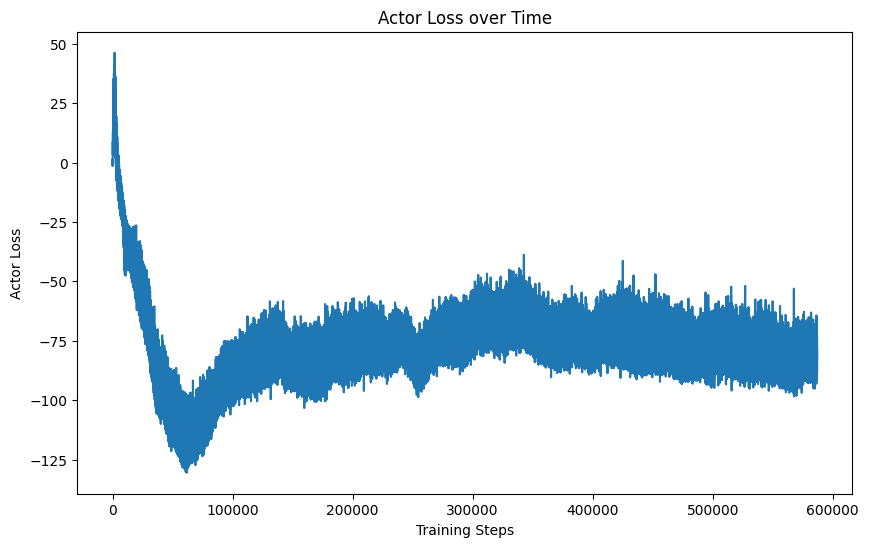

In [14]:
# plot demonstrating the actor's loss over time
plt.figure(figsize=(10, 6))
plt.plot(actor_losses)
plt.title("Actor Loss over Time")
plt.xlabel("Training Steps")
plt.ylabel("Actor Loss")
plt.show()

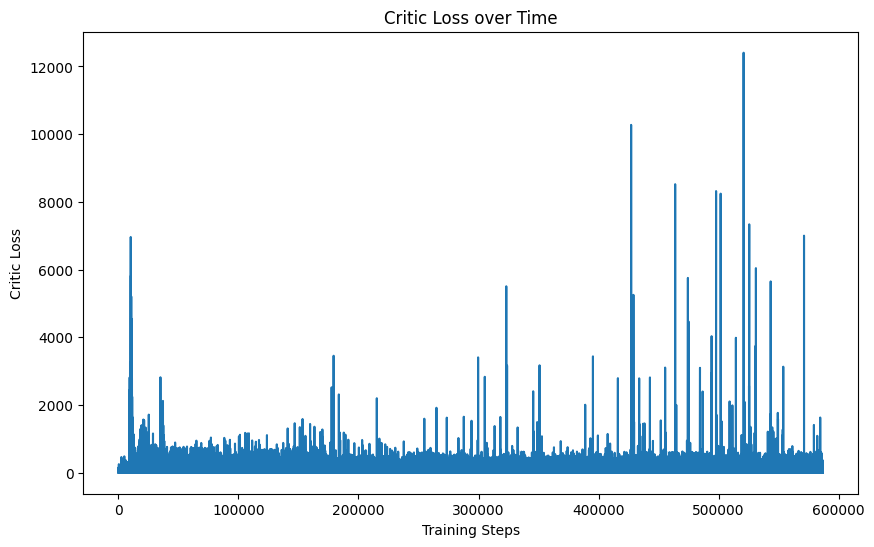

In [15]:
# plot demonstrating the critic's loss over time
plt.figure(figsize=(10, 6))
plt.plot(critic_losses)
plt.title("Critic Loss over Time")
plt.xlabel("Training Steps")
plt.ylabel("Critic Loss")
plt.show()

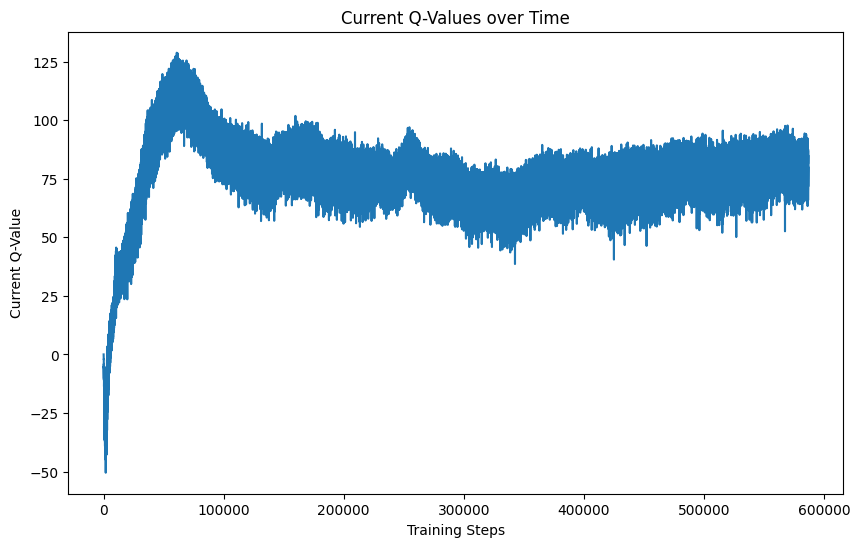

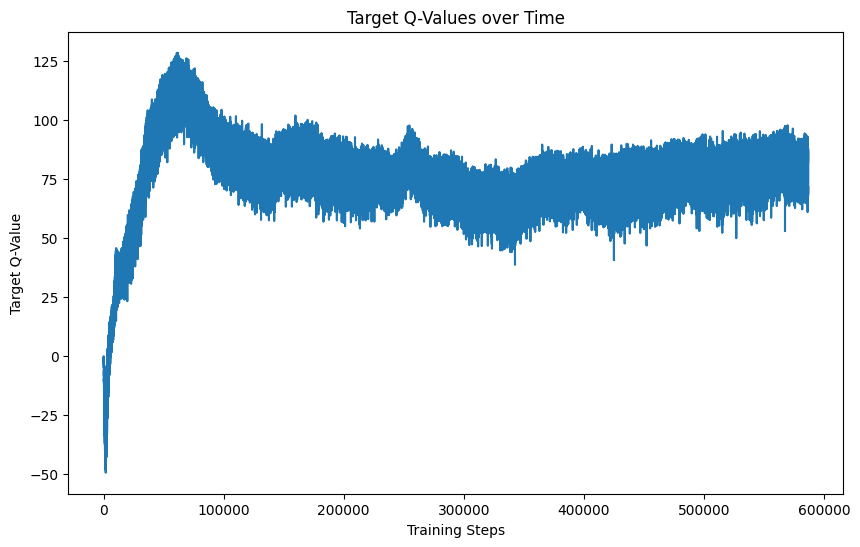

In [16]:
# these two plots show the current Q-Value next to the Q-Value we want to get to
plt.figure(figsize=(10, 6))
plt.plot(current_Q_means)
plt.title("Current Q-Values over Time")
plt.xlabel("Training Steps")
plt.ylabel("Current Q-Value")
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(target_Q_means)
plt.title("Target Q-Values over Time")
plt.xlabel("Training Steps")
plt.ylabel("Target Q-Value")
plt.show()

### Test Previous Runs

In [17]:
import gymnasium as gym
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import random
from collections import deque

In [18]:
class Actor(nn.Module):
    def __init__(self, state_dimensions, action_dimensions, max_action):
        super(Actor, self).__init__()

        # first layer of the neural network, state_dimension amt of neurons to 256 neurons
        self.first_layer = nn.Linear(state_dimensions, 256)


        self.second_layer = nn.Linear(256, 256)

        # 256 neurons to action_dimension amt of neurons
        self.third_layer = nn.Linear(256, action_dimensions)

        # the scale of the action (-1, 1) for our purposes
        self.max_action = max_action


    def forward(self, state):
        # returns a "tensor" (a matrix with a single column) representing the output of the first layer
        x = torch.relu(self.first_layer(state))
        x = torch.relu(self.second_layer(x))

        # returns a tensor with one column and eight rows, each item represents the
        # continous action to take on a given control (left axis, right axis, etc)
        action = torch.tanh(self.third_layer(x)) * self.max_action
        return action

In [19]:
human_env = gym.make("LunarLanderContinuous-v2", render_mode="human")
state_dimensions = human_env.observation_space.shape[0]
action_dimensions = human_env.action_space.shape[0]
max_action = human_env.action_space.high[0]
loaded_actor = Actor(state_dimensions, action_dimensions, max_action)
loaded_actor.load_state_dict(torch.load('base_run.pth'))
loaded_actor.eval()
num_test_episodes = 100
total_reward = 0
for episode in range(num_test_episodes):

    state, _ = human_env.reset()
    episode_reward = 0
    done = False

    while not done:
        human_env.render()

        state_tensor = torch.FloatTensor(state).unsqueeze(0)

        with torch.no_grad():
            action = loaded_actor(state_tensor).numpy()[0]

        action = np.clip(action, -max_action, max_action)

        next_state, reward, done, _, info = human_env.step(action)
        episode_reward += reward

        state = next_state

    print(f"Test Episode: {episode + 1}, Reward: {episode_reward}")
    total_reward += episode_reward

print(f"Average Reward Over {num_test_episodes} Runs: {total_reward/num_test_episodes}")

human_env.close()


C:\Users\Zach\AppData\Local\Temp\ipykernel_38688\69190484.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_actor.load_state_dict(torch.load('base_run.pth'))


Test Episode: 1, Reward: 273.88214948771093
Test Episode: 2, Reward: 127.0782031198944
Test Episode: 3, Reward: 292.9296278150152


KeyboardInterrupt: 